## Customer Purchase Analysis

A leading car company has recently launched a new SUV model and aims to maximize its marketing efficiency by targeting the right audience. My mission is to develop a **classification model** that predicts whether a customer is likely to purchase the new SUV, based on historical purchase behavior.

To support this effort, the company has provided a dataset named **customer_purchase_history.csv**, which contains information on past customers. Each entry in the dataset includes the following features:

- **Age** of the customer  
- **Estimated Salary**  
- **Purchased** (Target Variable):  
  - 1 if the customer previously purchased an SUV  
  - 0 if not  

### Business Impact

This classification model will help the marketing team target high-potential customers with personalized social media advertisements, ultimately aiming to **increase the conversion rate** for the new SUV.

### Exploratory Data Analysis

#### Importing the Liabraries

In [376]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

#### Basic Information of the Dataset

In [379]:
dataset = pd.read_csv('customer_purchase_history.csv')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              400 non-null    int64
 1   EstimatedSalary  400 non-null    int64
 2   Purchased        400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB


#### Summary statistics

In [382]:
dataset.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


#### Univariate Analysis

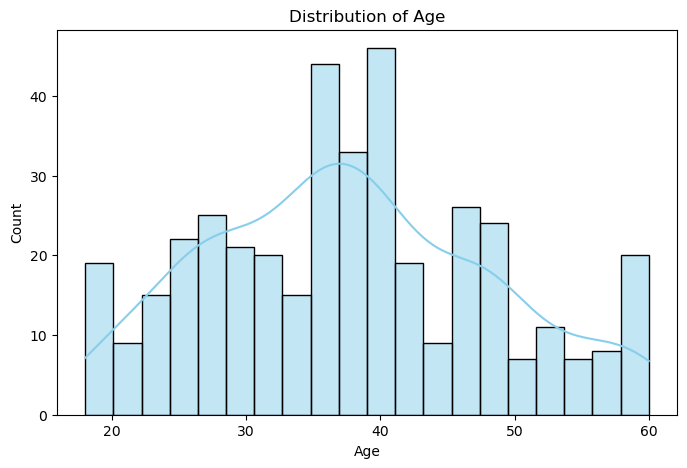

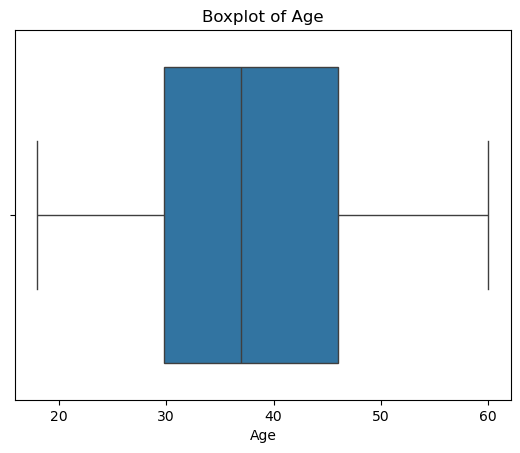

In [385]:
# Goal: See how ages are spread - young vs old, skewness, etc.

plt.figure(figsize=(8,5))
sns.histplot(dataset['Age'], bins=20, kde=True, color='skyblue')
plt.title("Distribution of Age")
plt.show()

sns.boxplot(x=dataset['Age'])
plt.title("Boxplot of Age")
plt.show()

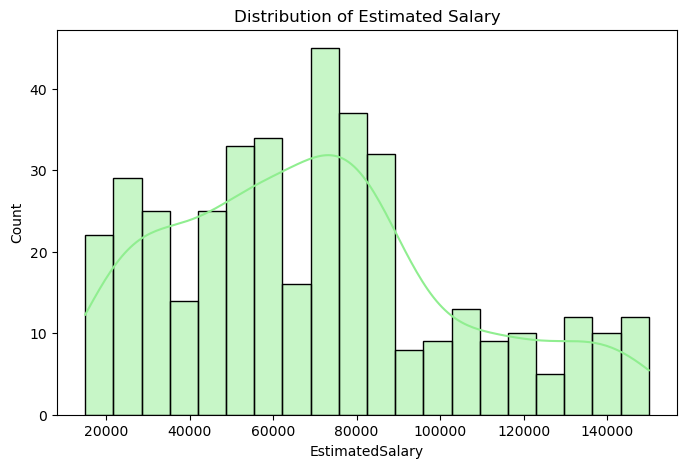

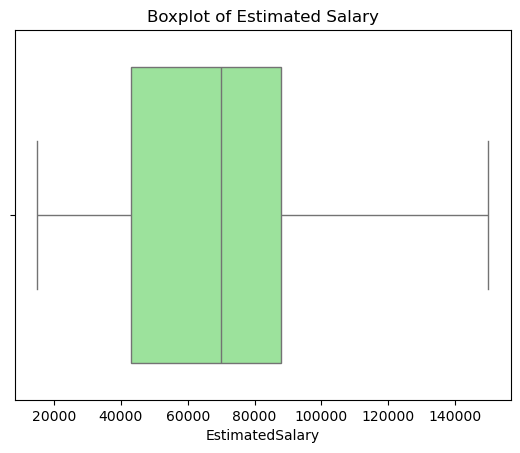

In [387]:
# Goal: Check income range and skewness.

plt.figure(figsize=(8,5))
sns.histplot(dataset['EstimatedSalary'], bins=20, kde=True, color='lightgreen')
plt.title("Distribution of Estimated Salary")
plt.show()

sns.boxplot(x=dataset['EstimatedSalary'], color='lightgreen')
plt.title("Boxplot of Estimated Salary")
plt.show()

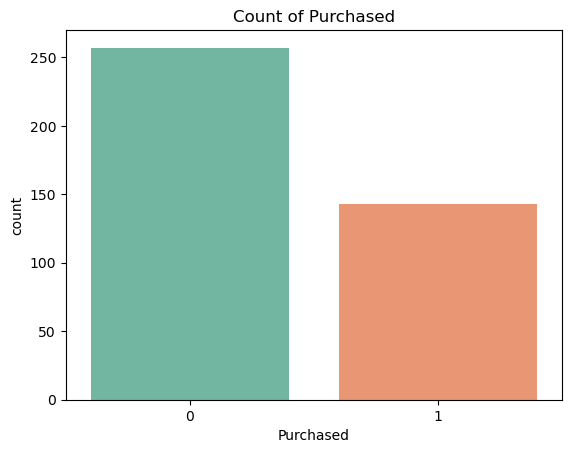

In [389]:
# Goal: See how balanced the target classes are.

sns.countplot(x='Purchased', hue='Purchased', data=dataset, palette='Set2', legend=False)
plt.title("Count of Purchased")
plt.show()

#### Bivariate Analysis

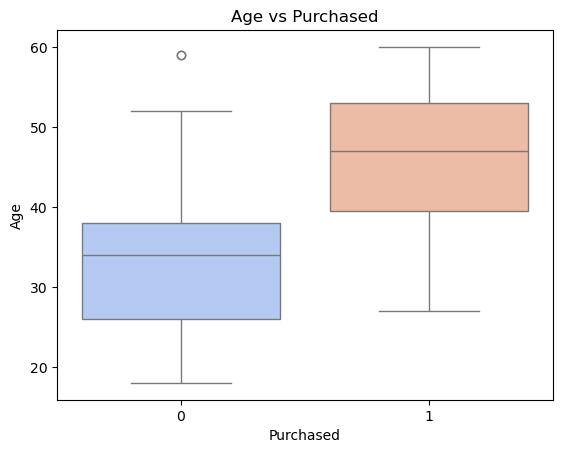

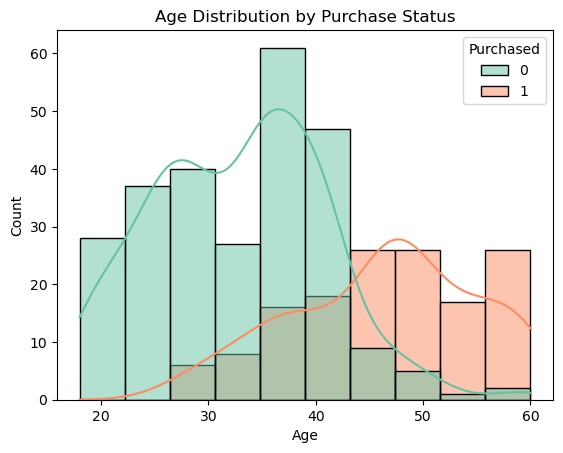

In [392]:
# Goal: See if older people buy more or less

sns.boxplot(x='Purchased', y='Age', hue='Purchased', data=dataset, palette='coolwarm', legend=False)
plt.title("Age vs Purchased")
plt.show()

sns.histplot(data=dataset, x='Age', hue='Purchased', kde=True, palette='Set2')
plt.title("Age Distribution by Purchase Status")
plt.show()

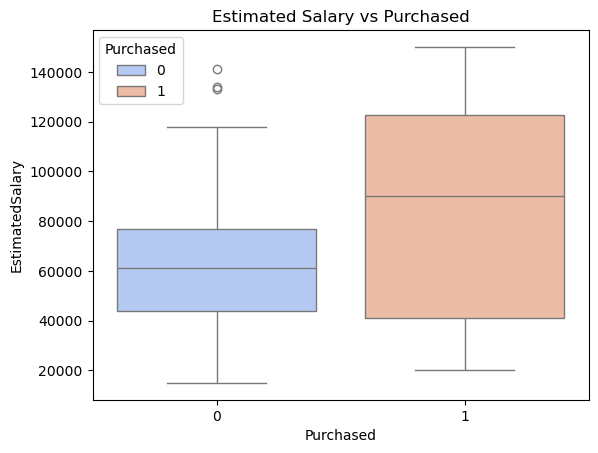

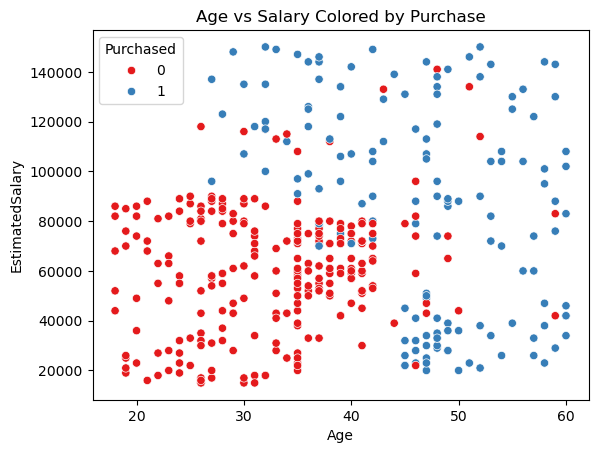

In [394]:
# Goal: See if income influences buying.

sns.boxplot(x='Purchased', y='EstimatedSalary', hue='Purchased', data=dataset, palette='coolwarm')
plt.title("Estimated Salary vs Purchased")
plt.show()

sns.scatterplot(data=dataset, x='Age', y='EstimatedSalary', hue='Purchased', palette='Set1')
plt.title("Age vs Salary Colored by Purchase")
plt.show()

#### Multivariate Analysis

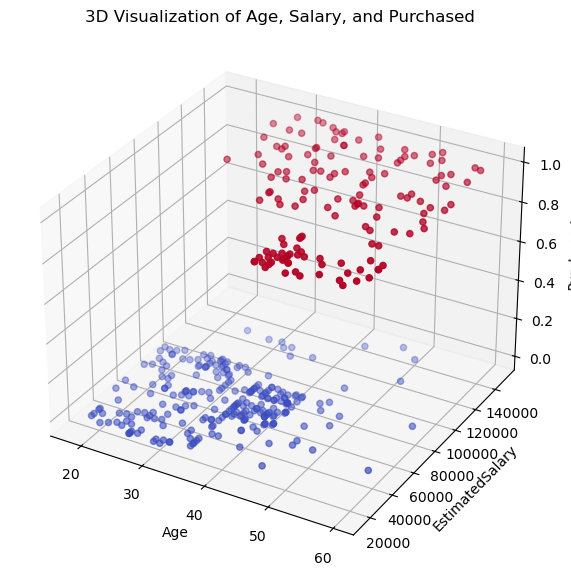

In [397]:
# Goal: See combined influence of Age and Salary on Purchase.

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(dataset['Age'], dataset['EstimatedSalary'], dataset['Purchased'], c=dataset['Purchased'], cmap='coolwarm')
ax.set_xlabel('Age')
ax.set_ylabel('EstimatedSalary')
ax.set_zlabel('Purchased')
plt.title("3D Visualization of Age, Salary, and Purchased")
plt.show()

#### Correlation Analysis

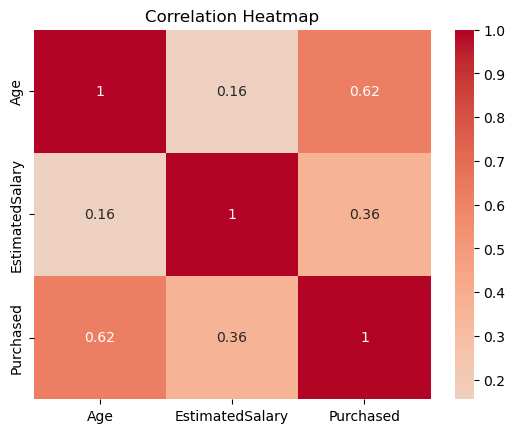

In [400]:
corr = dataset.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title("Correlation Heatmap")
plt.show()

#### Outlier Detection

In [403]:
# Using IQR method
for col in ['Age', 'EstimatedSalary']:
    Q1 = dataset[col].quantile(0.25)
    Q3 = dataset[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR
    outliers = dataset[(dataset[col] < lower) | (dataset[col] > upper)]
    print(f"{col}: {len(outliers)} outliers")

Age: 0 outliers
EstimatedSalary: 0 outliers


## Implimenting Logistic Regression

#### Import Libraries

In [407]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    confusion_matrix, accuracy_score, precision_score,
    recall_score, f1_score, roc_auc_score, RocCurveDisplay
)

#### Load Dataset

In [410]:
dataset = pd.read_csv('customer_purchase_history.csv')

In [412]:
print(dataset.head())

   Age  EstimatedSalary  Purchased
0   19            19000          0
1   35            20000          0
2   26            43000          0
3   27            57000          0
4   19            76000          0


#### Separate Features and Target

In [415]:
X = dataset[['Age', 'EstimatedSalary']]  # Features
y = dataset['Purchased']                 # Target

#### Split into Train and Test Sets

In [418]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

#### Feature Scaling

In [421]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### Train Logistic Regression Model

In [424]:
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_scaled, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


#### Make Predictions

In [427]:
y_pred = log_reg.predict(X_test_scaled)
y_prob = log_reg.predict_proba(X_test_scaled)[:, 1]  # Probability scores

#### Evaluate the Model

In [430]:
print("Model Evaluation Metrics")
print("Accuracy :", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall   :", recall_score(y_test, y_pred))
print("F1 Score :", f1_score(y_test, y_pred))
print("ROC AUC  :", roc_auc_score(y_test, y_prob))

Model Evaluation Metrics
Accuracy : 0.8625
Precision: 0.9047619047619048
Recall   : 0.6785714285714286
F1 Score : 0.7755102040816326
ROC AUC  : 0.9684065934065934


#### Confusion Matrix Visualization

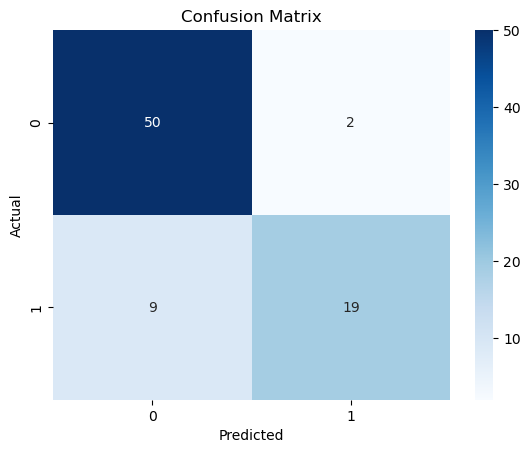

In [433]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

####  ROC Curve

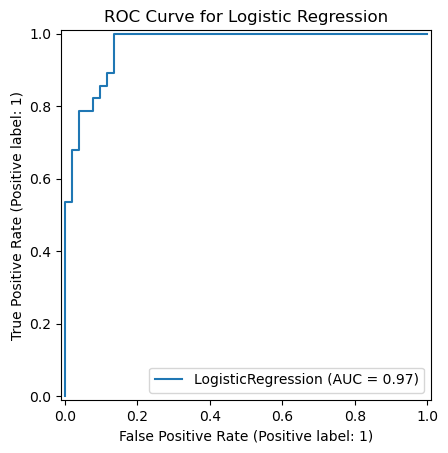

In [436]:
RocCurveDisplay.from_estimator(log_reg, X_test_scaled, y_test)
plt.title("ROC Curve for Logistic Regression")
plt.show()

#### Visualising the Training set results

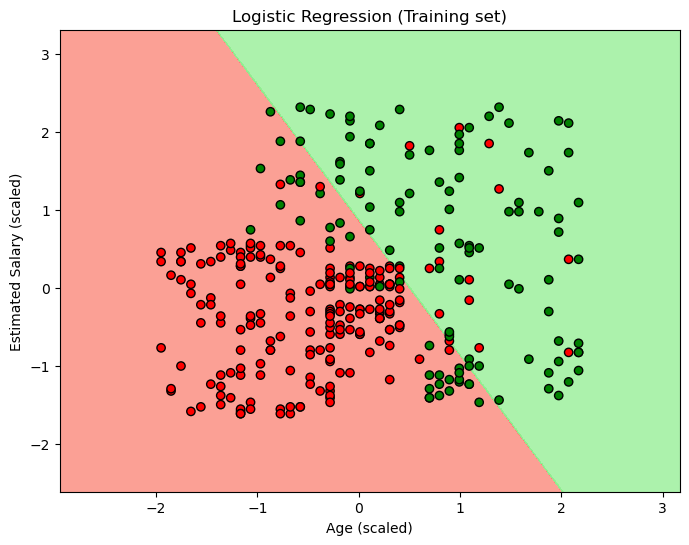

In [439]:
from matplotlib.colors import ListedColormap
import numpy as np
import matplotlib.pyplot as plt

# Create a mesh grid for the feature space
X_set, y_set = X_train_scaled, y_train

X1, X2 = np.meshgrid(
    np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
    np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01)
)

plt.figure(figsize=(8, 6))
plt.contourf(
    X1, X2,
    log_reg.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
    alpha=0.75, cmap=ListedColormap(('salmon', 'lightgreen'))
)

# Scatter actual training points
plt.scatter(
    X_set[:, 0], X_set[:, 1],
    c=y_set, edgecolor='k',
    cmap=ListedColormap(('red', 'green'))
)
plt.title('Logistic Regression (Training set)')
plt.xlabel('Age (scaled)')
plt.ylabel('Estimated Salary (scaled)')
plt.show()

#### Visualising the Test set results

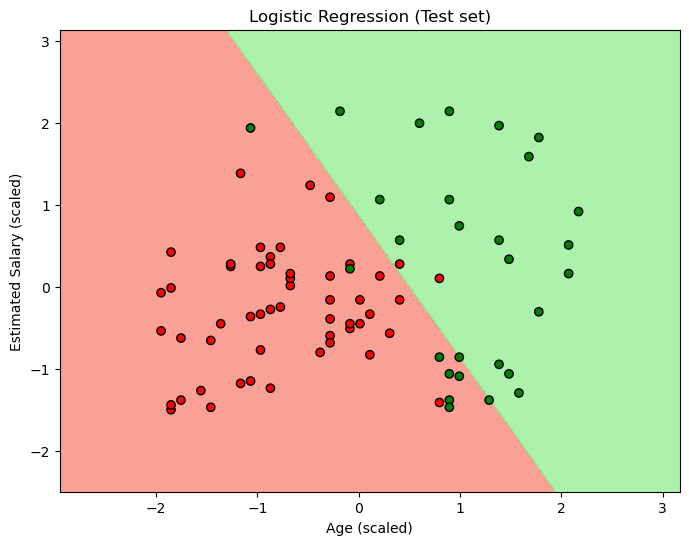

In [442]:
X_set, y_set = X_test_scaled, y_test

X1, X2 = np.meshgrid(
    np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
    np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01)
)

plt.figure(figsize=(8, 6))
plt.contourf(
    X1, X2,
    log_reg.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
    alpha=0.75, cmap=ListedColormap(('salmon', 'lightgreen'))
)

plt.scatter(
    X_set[:, 0], X_set[:, 1],
    c=y_set, edgecolor='k',
    cmap=ListedColormap(('red', 'green'))
)
plt.title('Logistic Regression (Test set)')
plt.xlabel('Age (scaled)')
plt.ylabel('Estimated Salary (scaled)')
plt.show()